# Ernostar 1928

https://worldwide.espacenet.com/patent/search/family/007074834/publication/DE458499C?q=pn%3DDE458499C

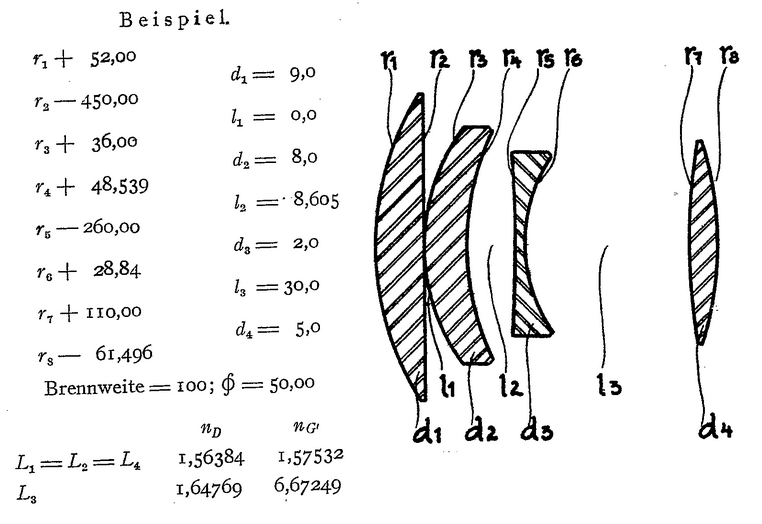

In [ ]:
import torch
import torchlensmaker as tlm

# TODO make name optional in materialmodel

# Fit Cauchy model from given values
def fit_cauchy(Nd, Ng, lambda_d, lambda_g):
    B = (Ng - Nd) / (1/(lambda_g**2) - 1/(lambda_d**2))
    A = Nd - B/(lambda_d**2)
    return tlm.CauchyMaterial(A, B)

# is L3 N_G' a typo?
# what is 6.67 ??

material1 = fit_cauchy(Nd=1.56384, Ng=1.57532, lambda_d=0.58929 , lambda_g=0.430790)
material2 = fit_cauchy(Nd=1.64769, Ng=1.67249, lambda_d=0.58929 , lambda_g=0.430790)

print(material1, material2)

tlm.plot_material_models([material1, material2], labels=["1", "2"])

# eye balling those as I can't find them in the patent
D1, D2, D3, D4 = 50, 35, 30, 35

r1 = tlm.Sphere(D1, 52)
r2 = tlm.Sphere(D1, -450)
r3 = tlm.Sphere(D2, 36)
r4 = tlm.Sphere(D2, 48.539)
r5 = tlm.Sphere(D3, -260)
r6 = tlm.Sphere(D3, 28.84)
r7 = tlm.Sphere(D4, 110)
r8 = tlm.Sphere(D4, -61.496)
d1, d2, d3, d4 = 9, 8, 2, 5
l1, l2, l3 = 0, 8.605, 30

L1 = tlm.Lens(r1, r2, material=material1, inner_thickness=d1)
L2 = tlm.Lens(r3, r4, material=material1, inner_thickness=d2)
L3 = tlm.Lens(r5, r6, material=material2, inner_thickness=d3)
L4 = tlm.Lens(r7, r8, material=material1, inner_thickness=d4)

x = tlm.parameter(60)

optics = tlm.Sequential(
    tlm.ObjectAtInfinity(beam_diameter=15, angular_size=20),
    tlm.ChromaticRange(400, 800),
    tlm.Gap(10),
    L1,
    tlm.Gap(l1),
    L2,
    tlm.Gap(l2),
    L3,
    tlm.Gap(l3),
    L4,
    tlm.Gap(x),
    tlm.ImagePlane(100),
)

tlm.show(optics, dim=2, sampling={"base": 5, "object": 5, "wavelength": 5})

tlm.plot_magnification(optics, sampling={"base": 5, "object": 5, "wavelength": 3})

In [ ]:
import torch.optim as optim

tlm.optimize(optics,
             dim=2,
             optimizer = optim.Adam(optics.parameters(), lr=1e-1),
             sampling = {"base": 5, "object": 10, "wavelength": 3},
             num_iter=100,
).plot()

In [ ]:
tlm.show(optics, dim=2, sampling={"base": 3, "object": 3, "wavelength": 10})
tlm.plot_magnification(optics, sampling={"base": 10, "object": 5, "wavelength": 3})